# INF8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2020 - TP1 - Méthodes de recherche 
### Membres de l'équipe
    - Luu Thien-Kim
    - Mellouk Souhaila
    - Younes Mourad


## Directives de remise
Le travail sera réalisé en équipe de trois. Vous remettrez un fichier nommé TP1\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb dans la boite de remise de travaux sur moodle. 

Le fichier devra être remis avant le **29 septembre à 23h55**. Tout travail en retard sera pénalisé
de 10\% de points en moins par jour de retard.


## Snail Labyrinth

*Snail Labyrinth* est un jeu dont le but est de guider des escargots dans un labyrinthe jusqu'à leur sortie personnelle. La taille des labyrinthes varie. Chaque escargot peut se déplacer dans cinq directions: vers le haut, vers le bas, vers la droite, vers la gauche et rester sur place. 

A chaque étape, chaque escargot à la possibilité d'effectuer un mouvement.
Les escargots ne peuvent pas se déplacer dans une case où se déplace un autre escargot. De plus, les escargots laissent derrière ils une substance toxique et ne peuvent donc pas se déplacer dans une case qui a déjà été occupée par un autre escargot.

A titre d'illustation, les images ci-dessous donnent un exemple d'une configuration initiale (Figure 1) et d'une configuration où deux mouvements ont eté realisés (Figure 2). Les étapes sont les suivantes:

- Etape 1: le escargot A se déplace vers la droite et le escargot B vers la droite.
- Etape 2: le escargot A se déplace vers la droite et le escargot B vers la droite.

<table><tr>
<td> <img src="https://imgur.com/3W4iDSk.png" alt="Drawing"/> <figcaption>Figure 1 - Example d'une configuration initiale.</figcaption></td>
<td> <img src="https://imgur.com/3uaD3AO.png" alt="Drawing"/><figcaption>Figure 2 - Example de deux mouvements.</figcaption> </td>
</tr></table>

L'objectif de ce TP est d'écrire un programme qui permet aux escargots d'atteindre leur destination en un **minimum de mouvements**.

Pour ce faire, il vous est demandé de compléter les deux classes fournies en Python. Vous pouvez réimplémenter ces classes-là et faire le TP dans un autre langage si vous le désirez.

## 1. Représentation du problème (10pts)

Le problème est défini par les règles suivantes. Les colonnes sont numérotées de gauche à droite de 0 à $m$ et les lignes sont numérotées de haut en bas, de 0 à $n$. Un escargot est considérée *résolue* lorsqu'il arrive à sa propre sortie.

L'état du labyrinthe est représenté par un objet de la classe **State** qui contient les variables d'instance suivantes: 

- `pos`: vecteur indiquant la position de chaque escargot sur la grille;
- `venoms`: ensemble des positions du poison laissé par les escargots;
- `d`: liste indiquant la direction du déplacement de chaque escargot fait à partir de l'état précédent pour atteindre l'état courant (0: rester en place, 1: vers le haut, 2: vers la droite, 3: vers le bas et 4: vers la gauche);
- `prev`: l'état précédent



In [97]:
import numpy as np
import math
import copy

class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        return math.fabs(other.x - self.x) + math.fabs(other.y - self.y)
        
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __repr__(self):
        return "(%d,%d)" % (self.x, self.y)
    
    def __str__(self):
        return "(%d,%d)" % (self.x, self.y)
    
    def __hash__(self):
        return int(self.x*1+self.y*2)

class State:
    
    """
    Contructeur d'un état initial
    """
    def __init__(self, pos):
        """
        pos donne la position du escargot i;
        """
        self.pos = np.array(copy.deepcopy(pos))
        """
        venoms garde les positions du poisons
        """
        self.venoms = set()
        
        """
        d et prev premettent de retracer l'état précédent et le dernier mouvement effectué
        """
        self.d = self.prev = None
        
        self.nb_moves = 0
        self.h = 0

    """
    Constructeur d'un état à partir mouvement (d)
    """
    def move(self, d):
        # TODO
        state = copy.deepcopy(self)
        state.prev = copy.deepcopy(self)
        for snail in range(len(self.pos)):
            if d[snail] == 1:
                state.venoms.add((state.pos[snail].x,state.pos[snail].y))
                state.pos[snail].x = state.pos[snail].x - 1
            if d[snail] == 2:
                state.venoms.add((state.pos[snail].x,state.pos[snail].y))
                state.pos[snail].y = state.pos[snail].y + 1
            if d[snail] == 3:
                state.venoms.add((state.pos[snail].x,state.pos[snail].y))
                state.pos[snail].x = state.pos[snail].x + 1
            if d[snail] == 4:
                state.venoms.add((state.pos[snail].x,state.pos[snail].y))
                state.pos[snail].y = state.pos[snail].y - 1
        return state
    
    def __eq__(self, other):
        if not isinstance(other, State):
            return NotImplemented
        if len(self.pos) != len(other.pos):
            print("les états n'ont pas le même nombre de limaces")

        return (len(self.venoms) == len(other.venoms) and np.array_equal(self.pos, other.pos) and self.venoms == other.venoms)
        
    def __hash__(self):
        h = 0
        for snail_position in self.pos:
            h += snail_position.x*25 + snail_position.y*30
        for venom_position in self.venoms:
            h += snail_position.x*25 + snail_position.y*30
        return int(h)
    
    def __lt__(self, other):
        return (self.nb_moves + self.h) < (other.nb_moves + other.h)

    def __repr__(self):
        out = ""
        for index, limace in enumerate(self.pos):
            out += "Escargot %d (%d,%d) | " % (index+1, limace.x, limace.y)
        return "State: " + out[:-3]
    
    def __str__(self):
        out = ""
        for index, limace in enumerate(self.pos):
            out += "Escargot %d (%d,%d) | " % (index+1, limace.x, limace.y)
        return out[:-3]
        

#### Implémentation 
   - Complétez la fonction ***move*** en déplaçant les escargots de 1 case dans la bonne direction (d[i]= 0, 1, 2, 3 ou 4). Nous supposons que le déplacement est possible lorsque la fonction est appelée. **Attention** : Cette fonction doit créer un nouvel objet *State* et définir les variables d'instance `prev`, `venoms` et `d`.
   
Vous pouvez tester votre code avec la fonction ***test1()*** dans la cellule suivante. Assurez-vous d'avoir déjà roulé la cellule avec la définition de la classe **State** avant. Vous devriez obtenir les résultats suivants:
```
True
(3,0)  (3,1)
True
True
```

In [98]:
def test1():
    b = True
    s0 = State([Position(0,0), Position(3,0)])
    s1 = s0.move([2,2])
    print(s1.prev == s0)
    b = b and s1.prev == s0
    print(s0.pos[1], " ", s1.pos[1])
    s1 = s1.move([0,0])
    print(s1 == s1.prev)
    b = b and s1 == s1.prev
    s1 = s1.move([3,3]).move([4,4]).move([1,1])
    s2 = s0.move([3,3]).move([2,2]).move([1,1]).move([0,0]).move([4,4])
    print(s1 == s2)
    b = b and s1 == s2
    
    print("\nrésultat correct" if b else "\nmauvais résultat")
    
test1()

True
(3,0)   (3,1)
True
True

résultat correct


## 2. Mouvements possibles (25pts)
Pour représenter le problème, nous allons utiliser la classe **Labyrinth** qui contient les champs suivants:

- `nb_lines`: le nombre de lignes de la grille;
- `nb_columns`: le nombre de colonnes de la grille;
- `exits`: un vecteur contenant la position de la sortie de chaque escargot (escargot $i$ sort à la sortie `exits[i]`);
- `walls`: un vecteur contenant la position de chaque murs dan la grille;
- `free_pos`: une matrice $n\times m$ contenant une valeur booléenne permettant de savoir si la case est libre ou non.

Toutes les informations pour un escargot se trouve au même indice $i$ dans chacun des vecteurs.

In [147]:
from collections import deque
import itertools as it
# from itertools import combinations
import heapq
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import itertools

class Labyrinth:
    
    def __init__(self, lines, columns ,exits, walls):
        self.nb_lines = lines
        self.nb_columns = columns
        self.exits = exits
        self.walls = walls
        
        self.free_pos = None

    """ est il final? """
    def success(self, state):
        # TODO
        return False

    def init_positions(self, state):
      #TODO
      self.free_pos = np.ones((self.nb_lines, self.nb_columns), dtype=bool)
      for walls in self.walls:
        self.free_pos[walls.x][walls.y] = False

      for x in range(self.nb_lines):
        for y in range(self.nb_columns):
          pos = str((x,y)).replace(' ', '')
          if pos in str(state.pos):
            self.free_pos[x][y] = False
          elif pos in str(state.venoms).replace(' ', ''):
            self.free_pos[x][y] = False
      return 0
  
              
    
    def possible_moves_snail(self, snail_position, exit_position, other_exits):
        moves = []  
        #possible movements
        goingUpPosition = Position(snail_position.x - 1, snail_position.y)
        goingRightPosition = Position(snail_position.x, snail_position.y + 1)
        goingDownPosition = Position(snail_position.x + 1, snail_position.y)
        goingLeftPosition = Position(snail_position.x, snail_position.y - 1)

        if goingUpPosition.x >= 0 and goingUpPosition.x < self.nb_lines and goingUpPosition.y >= 0 and goingUpPosition.y < self.nb_columns :
            if self.free_pos[goingUpPosition.x][goingUpPosition.y] and goingUpPosition not in other_exits : #l'escargot peut-il aller vers le haut?
                moves.append((1, goingUpPosition))
        if goingRightPosition.x >= 0 and goingRightPosition.x < self.nb_lines and goingRightPosition.y >= 0 and goingRightPosition.y < self.nb_columns :
            if self.free_pos[goingRightPosition.x][goingRightPosition.y] and goingRightPosition not in other_exits : #l'escargot peut-il aller vers la droite?
                moves.append((2, goingRightPosition))
        if goingDownPosition.x >= 0 and goingDownPosition.x < self.nb_lines and goingDownPosition.y >= 0 and goingDownPosition.y < self.nb_columns :
            if self.free_pos[goingDownPosition.x][goingDownPosition.y] and goingDownPosition not in other_exits : #l'escargot peut-il aller vers le bas ?
                moves.append((3, goingDownPosition))
        if goingLeftPosition.x >= 0 and goingLeftPosition.x < self.nb_lines and goingLeftPosition.y >= 0 and goingLeftPosition.y < self.nb_columns :
            if self.free_pos[goingLeftPosition.x][goingLeftPosition.y] and goingLeftPosition not in other_exits : #l'escargot peut-il aller vers la gauche ?
                moves.append((4, goingLeftPosition))    
        moves.append((0, snail_position)) #l'escargot peut toujours rester sur place
        return moves

    def possible_moves(self, state):
        self.init_positions(state)
        new_states = []
        snailsPositions = state.pos
        combi = []
        numberOfSnails = len(snailsPositions)
        
        #ajoute à combi la liste des déplacements possibles pour chaque escargot
        for i in range(numberOfSnails) : 
            otherExists = copy.deepcopy(self.exits)
            otherExists.remove(self.exits[i])
            combi.append(self.possible_moves_snail(snailsPositions[i], self.exits[i], otherExists))
            
        moves = list(itertools.product(*combi)) #combinaisons possibles de tous les états suivants possibles
        for possibleMove in moves :
            numberOfMoves = 0
            differentPositions = 0
            state = []
            newState = []
            for snail in possibleMove :
                numberOfMoves += snail[0]
                state.append(snail)
            for position in state :
                newState.append(position[1])
            
            newState = list(dict.fromkeys(newState)) #supprime les déplacements menant à la même position (conflit)            
            if len(newState) != numberOfSnails :
                newState = []
            if numberOfMoves != 0 and newState: #si au moins 1 escargot se déplace et que state ne soit pas vide
                new_states.append(State(newState))
        
#         print(new_states)
        
        return new_states

    def solve(self, state):
        to_visit = set()
        fifo = deque([state])
        to_visit.add(state)
        # TODO
        
        while len(fifo)> 0: 
            node = fifo.popleft()
            to_visit.add(node)
            if self.success(node):#manque de voir if etat mnt  = etat de fin, ne marche pas avec success 
                print('SUUUUUUUUCCCCCCEEEEEESSSSSSSSS')
                return node 
            else:
                for move in self.possible_moves(node):
                    if move not in to_visit:
                        print('pas success')
                        to_visit.add(move)
                        fifo.append(move)
        return node

    """
    Estimation du nombre de coup restants 
    """
    def estimee1(self, state):
        # TODO
        max = 0
        for snail in range(len(state.pos)):
            temp = state.pos[snail].distance(self.exits[snail])
            if temp > max:
                max = temp
        
        return max

    def estimee2(self, state):
        # TODO
        return 0
                    
    def solve_Astar(self, state):
        #TODO
        to_visit = set()
        to_visit.add(state)
        
        priority_queue = []
        state.h = self.estimee1(state)
        heapq.heappush(priority_queue, state)
        
        while len(priority_queue) > 0:
            current_state = heapq.heappop(priority_queue)
            to_visit.add(current_state)
            moves = possible_moves(current_state)
            
            if self.success(current_state):
                return current_state
            
            children = []
            for next_state in moves:
                children.append(next_state)
            for child in children:
                if child in to_visit:
                    continue
                child.h = self.estimee1(child)
                if child in priority_queue and child.__lt__(current_state) == False:
                    continue
                heapq.heappush(priority_queue, child)       
                    
    def print_solution(self, state):
        # TODO
        return 0

    def print_labyrinth(self, state, show_all=True):

        nb_rows = self.nb_lines
        nb_cols = self.nb_columns
        snails_str = ["L_a", "L_b", "L_c", "L_d", "L_e"]
        venom_str = "x"
        exits_str = ["[E_a]","[E_b]","[E_c]","[E_d]","[E_e]"]
        colors = ["red","blue","green","pink","yelllow"]

        if state.prev == None:
            # Prepare table
            cell_text = [["" for j in range(nb_cols+1)] for i in range(nb_rows)]

            fig, ax = plt.subplots()
            fig.set_size_inches((nb_cols+1)*.5,(nb_rows+1)*.5)
            ax.axis('tight')
            ax.axis('off')
            table = ax.table(cellText=cell_text,cellLoc='center', colColours=["gray"]*(nb_cols+1),
                                colWidths=[0.2 for j in range(nb_cols+1)],
                                colLabels=[""]+['$\\bf{%d}$' % val for val in range(nb_cols)],loc='center')
            table.set_fontsize(13)
            table.auto_set_font_size(False)

            cellDict = table.get_celld()
            for i in range(nb_cols+1):
                for j in range(nb_rows+1):
                    cellDict[(j,i)].set_height(.2)

            for i in range(nb_rows+1):
                table[(i, 0)].visible_edges = "open"
            for i in range(nb_cols+1):
                table[(0, i)].visible_edges = "open"
            for i in range(nb_rows):
                table[(i+1, 0)].get_text().set_text("$\\bf{%d}$" % i)

            # Walls
            for i in self.walls:
                table[(i.x+1,i.y+1)].set_facecolor("black")
            # Exits
            for index,i in enumerate(self.exits):
                table[(i.x+1, i.y+1)].get_text().set_text(exits_str[index])
                table[(i.x+1, i.y+1)].get_text().set_color(colors[index])
            # Snails
            for index,snail in enumerate(state.pos):
                table[(snail.x+1, snail.y+1)].get_text().set_text(snails_str[index])
                table[(snail.x+1, snail.y+1)].get_text().set_color(colors[index])
            
            if not show_all:
                clear_output(wait=True)
            fig.suptitle('Snail labyrinth (step = %d)' % 0, x=0.5, y=1.2,fontsize=16)
            display(fig)
            if not show_all:
                time.sleep(1)

            return fig,table,1

        fig,table, n = self.print_labyrinth(state.prev, show_all)

        # Snails
        for index,snail in enumerate(state.pos):
            table[(state.prev.pos[index].x+1, state.prev.pos[index].y+1)].get_text().set_text(venom_str) # Venom
            table[(snail.x+1, snail.y+1)].get_text().set_text(snails_str[index])
            table[(snail.x+1, snail.y+1)].get_text().set_color(colors[index])

        if not show_all:
            clear_output(wait=True)
        fig.suptitle('Snail labyrinth (step = %d)' % n, x=0.5, y=1.2, fontsize=16)
        display(fig)
        if not show_all:
            time.sleep(1)

        return fig,table, n+1


In [148]:
lb = Labyrinth(5, 7,
              [Position(0,4), Position(0,6)],
              [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
s = State([Position(0,0), Position(3,0)])
lb.estimee1(s)

9.0

   #### Implémentation
   - Complétez la méthode ***success*** de la classe **Labyrinth** qui indique si un état est final. Cette méthode vérifie si toutes les escargots sont à leur position de sortie. Vous devriez obtenir les résultats suivants:
```
True
True
False
```

In [149]:
def test2():
    b = True
    lb = Labyrinth(5, 7,
                  [Position(0,4), Position(0,6)],
                  [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
    s = State([Position(0,0), Position(3,0)])
    s = s.move([3,3]).move([3,2]).move([2,2]).move([3,2]).move([2,2]).move([2,2]).move([2,2]).move([2,1]).move([1,1]).move([1,1]).move([1,1]).move([4,0])
    b = b and lb.success(s)
    print(lb.success(s))

    lb = Labyrinth(8,8,
                   [Position(0,4), Position(0,6), Position(7,0)],
                   [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4), Position(6,2), Position(6,4), Position(6,5), Position(6,6), Position(7,1), Position(7,2), Position(7,3), Position(7,4)])
    s = State([Position(0,0), Position(3,0), Position(7,7)])
    s = s.move([3,3,1]).move([3,2,1]).move([2,2,4]).move([3,2,4]).move([2,2,4]).move([2,2,4]).move([2,2,4]).move([2,1,4]).move([1,1,4]).move([1,1,3]).move([1,1,3]).move([4,0,0])
    b = b and lb.success(s)
    print(lb.success(s))
    s = s.move([2,2,2])
    b = b and not lb.success(s)
    print(lb.success(s))
    print("\nrésultat correct" if b else "\nmauvais résultat")

test2()

False
False
False

mauvais résultat


#### Implémentation 
   - Nous voulons utiliser une matrice $n \times m$ `free_pos` indiquant les cases du labyrinthe qui sont libres. Complétez la méthode **init_positions(State)** qui initialise la matrice `free_pos` en fonction de l'état donné.
   Par convention, *True* indique que la case est libre, et  `free_pos[i,j]` représente la case (ligne,colonne) du labyrinthe.

Exécutez la cellule suivante pour tester la fonction ***init_positions(s)*** de votre code. Vous devriez obtenir les résultats suivants:
```
[[False  True  True False  True  True  True]
 [ True  True  True False  True  True  True]
 [ True  True False False False  True  True]
 [False  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]

 [[False False False False  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]
```

In [150]:
def test3():
    lb = Labyrinth(5, 7,
                  [Position(0,4), Position(0,6)],
                  [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
    s = State([Position(0,0), Position(3,0)])
    lb.init_positions(s)
    b = True
    print(lb.free_pos)
    ans = [[False,True,True,False,True,True,True],[True,True,True,False,True,True,True],
          [True,True,False,False,False,True,True],[False,True,True,True,True,True,True],
          [True,True,True,True,True,True,True]]
    result = lb.free_pos == ans
    for i in range(5):
        for j in range(7):
            b = b and result[i,j]
    print("\n", "résultat correct" if b else "mauvais résultat", "\n")
    s = s.move([2,2]).move([2,1]).move([3,4]).move([4,0]).move([4,0])
    lb.init_positions(s)
    b = True
    print(lb.free_pos)
    ans = [[False,False,False,False,True,True,True],[False,False,False,False,True,True,True],
          [False,False,False,False,False,True,True],[False,False,True,True,True,True,True],
          [True,True,True,True,True,True,True]]
    result = lb.free_pos == ans
    for i in range(5):
        for j in range(7):
            b = b and result[i,j]
    print("\n", "résultat correct" if b else "mauvais résultat", "\n")
            
test3()

[[False  True  True False  True  True  True]
 [ True  True  True False  True  True  True]
 [ True  True False False False  True  True]
 [False  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]

 résultat correct 

[[False False False False  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]

 résultat correct 



#### Implémentation 
   - Complétez la méthode **possible_moves_snail(snail_position, exit_position, other_exits)** qui à partir de la position d'un escargot, renvoie l'ensemble des mouvements possibles ainsi que leur destination. Cet ensemble est représenté par une liste de `tuple(mouvement,position)`; l'ordre dans la liste n'a pas d'importance. 
   - Complétez la méthode **possible_moves(state)**  qui combine les possibilités de déplacement de toutes les escargots, donné par la fonction **possible_moves_snail**, et renvoie l'ensemble d'états qui peuvent être atteints à partir de l'état *state*. Cet ensemble est représenté par une liste d'états (*states*); l'ordre dans la liste n'est pas important. 
   
**Attention:** comment indiqué précédemment, deux escargots ne peuvent pas se déplacer au même endroit. De plus, on considère qu'il y a un mouvement lorsqu'au moins un escargot se déplace. Une situation où aucune escargot ne se déplace n'est ainsi pas considérée comme un mouvement. Finalement,
notez qu'une escargot ne peut pas se déplacer à une sortie d'un autre escargot.

Exécutez la cellule suivante pour tester votre code. Elle testera les deux fonctions ***possible_moves_snail(snail_position, exit_position, other_exits)*** et ***possible_moves(state)***. Vous devriez obtenir les résultats suivants:
```
[(1, (0,1)), (4, (1,0)), (0, (1,1))]
[(2, (2,2)), (3, (3,1)), (4, (2,0)), (0, (2,1))]
[(1, (0,3)), (0, (1,3))]
11
19
35
```
Il y a ainsi 11 mouvements possibles à partir de l'état représenté par l'image trouvée au début du TP. Il y a 19 mouvements possibles à partir de l'état suivant où les escargots sont se sont déplacées d'une case vers la droite.

In [151]:
def test4():
    b = True
    lb = Labyrinth(4, 4,
                    [Position(2,3), Position(1,2), Position(0,0)],
                    [])
    s0 = State([Position(1,1), Position(2,1), Position(1,3)])
    lb.init_positions(s0)
    possible1 = lb.possible_moves_snail(Position(1,1),Position(2,3),[Position(1,2), Position(0,0)])
    print(possible1)
    ver = True
    for i in possible1:
        if i not in [(1,Position(0,1)), (4,Position(1,0)), (0,Position(1,1))]:
            ver = False
    b = b and len(possible1) == len([(1,Position(0,1)), (4,Position(1,0)), (0,Position(1,1))]) and ver
    possible2 = lb.possible_moves_snail(Position(2,1),Position(1,2),[Position(2,3), Position(0,0)])
    print(possible2)
    ver = True
    for i in possible2:
        if i not in [(2, Position(2,2)), (3, Position(3,1)), (4, Position(2,0)), (0, Position(2,1))]:
            ver = False
    b = b and len(possible2) == len([(2, Position(2,2)), (3, Position(3,1)), (4, Position(2,0)), (0, Position(2,1))]) and ver
    possible3 = lb.possible_moves_snail(Position(1,3),Position(0,0),[Position(2,3), Position(1,2)])
    print(possible3)
    ver = True
    for i in possible3:
        if i not in [(1, Position(0,3)), (0, Position(1,3))]:
            ver = False
    b = b and len(possible3) == len([(1, Position(0,3)), (0, Position(1,3))]) and ver
    lb = Labyrinth(5, 7,
                  [Position(0,4), Position(0,6)],
                  [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
    s = State([Position(0,0), Position(3,0)])
    s2 = State([Position(0,1), Position(3,1)])
    s3 = State([Position(3,5), Position(4,4), Position(1,4)])
    l1 = len(lb.possible_moves(s))
    print(l1)
    b = b and l1 == 11
    l2 = len(lb.possible_moves(s2))
    print(l2)
    b = b and l2 == 19
    lb = Labyrinth(5, 7,
                  [Position(0,4), Position(0,6), Position(0,2)],
                  [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
    l3 = len(lb.possible_moves(s3))
    print(l3)
    b = b and l3 == 35
    print("\n", "résultat correct" if b else "mauvais résultat", "\n")
test4()

[(1, (0,1)), (4, (1,0)), (0, (1,1))]
[(2, (2,2)), (3, (3,1)), (4, (2,0)), (0, (2,1))]
[(1, (0,3)), (0, (1,3))]
11
19
35

 résultat correct 



## 3. À la recherche d'une solution (30pts)

Il est maintenant possible de chercher une solution avec notre implémentation actuelle. Il y a deux idées principales: 

1. Nous cherchons la solution la plus rapide, il nous faut énumérer tous les états pour les ordonner en ordre croissant en terme de nombre de mouvements. On va donc utiliser une file de type FIFO. 
2. Il est nécessaire de mémoriser les états que l'on a déjà trouvé. Pour cela on va utiliser un ensemble hash. Il s'agit d'utiliser une variable locale **to_visit** de type *set*.

On peut représenter un ensemble d'état par un arbre dont la racine est l'état initial et les nœuds correspondent aux états `s`. La relation entre chaque état est de type `s` *est fils de* `p`, où `s` et `p` sont deux états. Autrement dit, `s` peut être obtenu à partir de `p` en un mouvement.

On cherche à faire une recherche en largeur sur cet arbre. On peut donc représenter la file par une liste (FIFO). La file commence avec l'état initial. Tant que la liste n'est pas vide, on extrait le premier état. Si l'état est final, on termine l'exécution de l'algorithme. Dans le cas contraire, on ajoute ses fils non visités à la fin de la liste. On ajoute ensuite cet état dans la liste `to_visit`.

#### Implementation 
   - Complétez la méthode **solve** en implémentant cet algorithme. La méthode doit renvoyer un état final (las limaces doivent être à leur sortie). 
   - Complétez la méthode **print_solution(state)** qui affiche une solution à partir d'un état final `state`. Il faut afficher les mouvements des escargots dans le bon ordre.

Utilisez la cellule suivante pour tester votre code. Vous devriez obtenir le résultat suivant:  
Il y a 7 mouvements à faire pour résoudre le problème de la figure de départ. **Note** Votre solution peut être différente de celle présentée ici, cela dépend de la méthode de construction de la liste dans la méthode ``possible_moves``. Cependant votre solution doit avoir le même nombre de mouvements (7).

![example7](https://imgur.com/6nXn3mp.png)

```
1. Escargot A vers la gauche, Escargot B vers la droite, Escargot C vers le haut.
2. Escargot A vers le bas, Escargot B vers le haut, Escargot C vers la gauche.
3. Escargot A vers le bas, Escargot B vers le centre, Escargot C vers la gauche.
4. Escargot A vers la droite, Escargot B vers le centre, Escargot C vers la gauche.
5. Escargot A vers la droite, Escargot B vers le centre, Escargot C vers le centre.
6. Escargot A vers la droite, Escargot B vers le centre, Escargot C vers le centre.
7. Escargot A vers le haut, Escargot B vers le centre, Escargot C vers le centre.
```

pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas 

pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas 

pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas 

pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas success
pas 

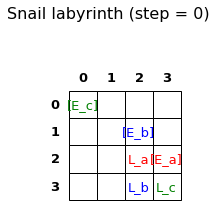

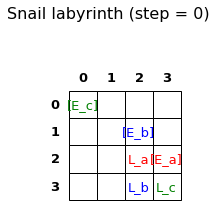

In [152]:
def solve7():
    lb = Labyrinth(4, 4,
                    [Position(2,3), Position(1,2), Position(0,0)],
                    [])
    s0 = State([Position(1,1), Position(2,1), Position(1,3)])
    s = %time lb.solve(s0)
    lb.print_solution(s)
#     Si vous voulez visualiser les résultats, décommenter la ligne ci-dessous.
    lb.print_labyrinth(s, show_all=True)
    
solve7()

#### Tests
Voici deux autres problèmes à résoudre : le premier doit être résolu en 9 mouvement; le second en 12.
<table><tr>
<td> <img src="https://i.imgur.com/QCf38qc.png" alt="Drawing"/> </td>
<td> <img src="https://i.imgur.com/3W4iDSk.png" alt="Drawing"/> </td>
</tr></table>

In [480]:
def solve9():
    lb = Labyrinth(5, 5,
                    [Position(3,4), Position(1,3)],
                    [])
    s0 = State([Position(2,0), Position(3,0)])
    s = %time lb.solve(s0)
    lb.print_solution(s)
#     Si vous voulez visualiser les résultats, décommenter la ligne ci-dessous.
#     lb.print_labyrinth(s, show_all=True)

def solve12():
    lb = Labyrinth(5, 7,
                [Position(0,4), Position(0,6)],
                [Position(0,3), Position(1,3), Position(2,3), Position(2,2), Position(2,4)])
    s0 = State([Position(0,0), Position(3,0)])
    s = %time lb.solve(s0)
    lb.print_solution(s)
#     Si vous voulez visualiser les résultats, décommenter la ligne ci-dessous.
#     lb.print_labyrinth(s, show_all=True)

solve9()
print("\n")
solve12()

Escargot 1 (2,0) | Escargot 2 (3,0)
CPU times: user 163 µs, sys: 66 µs, total: 229 µs
Wall time: 194 µs


Escargot 1 (0,0) | Escargot 2 (3,0)
CPU times: user 38 µs, sys: 19 µs, total: 57 µs
Wall time: 50.8 µs


## 4. A* algorithme (35pts)

La méthode proposée précédemment utilise une recherche en largeur pour trouver la solution. Une solution plus rapide peut être mise en place avec un algorithme `A*`. L'idée principale de l'algorithme A* est d'insérer de *l'intelligence artificielle* à la méthode de résolution. Ceci est fait en utilisant une fonction d'estimation qui permet d'évaluer la distance entre un état et la solution. 

Au lieu d'utiliser une approche *first-in first-out (premier entré, premier sorti)* lors de la visite des états, l'algorithme A* défini une valeur de priorité pour chaque état, à partir de la fonction d'estimation, et commence par visiter les états les plus prioritaires. Pour cela, on utilise une structure de données bien plus appropriée : une file de priorité.

En plus de la fonction d'estimation, A* doit aussi tenir compte d'une autre information importante : le coût actuel de l'état. Ce coût est tout simplement, dans notre cas, la distance entre l'état actuel et l'état initial. Ces deux éléments mis ensembles permettent de calculer la fonction d'estimation heuristique ***f*** d'un état `s`, comme la somme du coût actuel de l'état ***c*** et de l'estimation du coût restant ***h***. 

<center> f(s) = coût(s) + h(s) </center>

**Mise en place de l'algorithme**

- Il nous faut donc calculer le nombre de mouvements nécessaires pour atteindre l'état actuel, `coût(s)`. Pour le calculer, créez une variable `nb_moves` dans la classe `State` qui enregistre le nombre de mouvements effectués pour arriver à cet état. Cette variable commence à 0 et doit être incrémentée à chaque fois que l'on crée un nouvel état en utilisant la fonction `move(d)`.

Le coût de la fonction d'estimation est représenté par la variable `h`. Cette fonction estime le nombre de coups restants. Cette composante joue un rôle important dans l'efficacité de l'algorithme A*. Cette variable est utilisée dans la fonction `__lt__` de la classe *State*, qui compare la fonction d'estimation ` f` de deux états. 

Il est donc important de créer une bonne fonction pour résoudre le problème. Plus cette fonction est efficace, moins d'états inutiles seront visités. Cette fonction doit par contre toujours renvoyer un minorant du nombre de coups restant. On va analyser deux fonctions différentes dans ce TP.

#### Fonction 1: à partir de la distance entre les escargots et leur sortie.
- Complétez dans la classe State, la fonction ``estimee1()`` qui renvoie la distance plus grande entre les escargots et leur sortie.
- Maintenant complétez la méthode `solve_Astar(state)` pour résoudre le problème de la même façon qu'au début du TP, mais en utilisant la file de priorité à la place d'une file ordinaire.
- Modifiez les fonctions `solve_Astar(state)` et `solve(state)` de façon à compter et afficher le nombre d'états visités lors de la résolution.
- Modifiez le code des fonctions `solve7(),solve9(),solve12()` pour résoudre les problèmes à l'aide de l'algorithme A*. Vérifiez que les solutions sont obtenues en autant de mouvements qu'avec le premier algorithme, mais avec un nombre inférieur d'états visités. 

N.B: Vous pouvez ajouter des cellules pour faire le test ou afficher les resultats des algorithmes dans une même cellule. Veillez à bien identifier les résultats affichés.




## 5. Amélioration de l'heuristique (Bonus - 10pts)
Proposez une autre fonction heuristique admissible meilleure que `estimee1` pour le problème et testez-la avec les exemples fournis (`solve7()`, `solve9()` et `solve12()`). Ajoutez une fonction nommée `estimee2` et implémentez votre heuristique. **N'oubliez pas de justifier votre choix d'heuristique.**

## Barême
Partie 1: 10 points

Partie 2: 25 points

Partie 3: 30 points

Partie 4: 35 points

Partie 5: 10 points (Bonus)

Pour un total de 110 points sur 100 points.

